# Dependencies

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model


# What is Machine Learning
- A formal definition of Machine Learning:
    - A computer program that is able to learn from experience **E** a task **T** with a performance metric **P** that improve with experience **E**
- An example of a machine learning problem is spam detection:
    - A normal approach would involve a series of hand-written rules that must be satisfied before declaring a email is not spam, such as checking for certain words or phrases etc. In contrast, a ML system will automatically learn which words are associated with spam emails and which are not. This is through supervised learning, where it may learn words that have specific frequencies associated with spam.
    - This approach is also useful as the ML system can adapt to new associations with spam emails as they evolve (here the user provides supervised feedback)
- ML systems can also allow humans to discover patterns that they would not otherwise be able to pick up, this approach is called **data mining**


# Types of ML systems

- supervised, unsupervised, semi-supervised
    - supervised learning is where the labels to the data are already given. Examples are regression, classification, NN's etc. 
        - a predictor can be referred to as an attribute or a feature, e.g. mileage of a car
    - unsupervised learning has no given labels, therefore, the job of the algorithm is to look for patterns within the data itself. For example, if the data are customers, there might be some customers that have groupings based on some of their attributes. Examples are in clustering or in anomaly detection. 
        - an important aspect for these types of algorithms is *dimensionality reduction* which essentially collapses/removes/creates features to create only useful features. 
        - in anomaly detection, the system is shown mostly normal examples, and then can learn to classify examples which do not fit this mold
        - association rule learning tries to look for relationships between different attributes. In purchasing decisions, could discover that those who buy x, y, also buy z. 
    - semi-supervised learning is where some data has labels and others does not. For example, in a photo database, the program may cluster several pictures by similarity and ask you to label that person. This label can then be used for future classification. Sometimes, the same person has multiple clusters. 
- online vs batch learning
    - batch learning is where the model must learn offline from the complete training set and is then deployed. If new data is available, the model must be taken offline and retrained on the whole of the data again
    - online learning allows for the model to be trained on incoming data to be processed as mini-batches. This has some issues where if new incoming data is reducing performance, then training must be stopped, or reversed

- instance based vs batch based
    - instance based learning is where the machine 'memorises' the instance of a certain label and uses a similarity measure to determine where the new data fall
    - in model based learning, the system forms a model of the examples and uses that model to make predictions about the new data 

# Example

In [3]:
import os
datapath = os.path.join("datasets", "lifesat", "") #'datasets\\lifesat\\'
# Download the data
import urllib.request
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
os.makedirs(datapath, exist_ok=True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

In [31]:
# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

In [9]:
oecd_bli.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


In [10]:
gdp_per_capita.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [32]:
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"] #get only rows with inequality = TOT
oecd_bli= oecd_bli.pivot(index="Country", columns="Indicator", values="Value") #pivot the data to align according to country and indicator
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True) #rename from 2015 to GDP per capita
gdp_per_capita.set_index("Country", inplace=True) #set the index to country
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                left_index=True, right_index=True)
full_country_stats.sort_values(by="GDP per capita", inplace=True) #sort ascending by GDP per capita

In [ ]:
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    keep_indices

In [34]:
country_stats=full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [37]:
# Translates slice objects to concatenation along the second axis
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

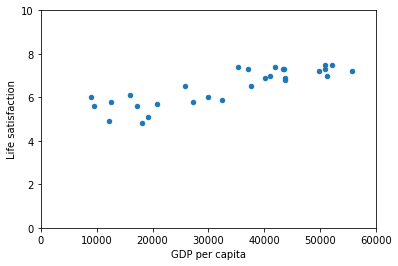

In [41]:
# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.axis([0, 60000, 0, 10])
plt.show()

In [39]:
# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

LinearRegression()

In [40]:
# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 5.96242338]]

[[5.96242338]]


Can alternatively answer the same question with an instance based model, KNN. 

Here the model looks at the closest GDP country to cyprus, and takes their happiness as a basis. For k=3, looks at the 3 closest countries

In [42]:
# Select a 3-Nearest Neighbors regression model
import sklearn.neighbors
model1 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

# Train the model
model1.fit(X,y)

# Make a prediction for Cyprus
print(model1.predict(X_new)) # outputs [[5.76666667]]

[[5.76666667]]


# Challenges of ML

- Not enough data
    -  “The Unreasonable Effectiveness of Data,” Peter Norvig et al. (2009)
    - Given very different models, if enough data is present, will likely converge, thus a good corpus is very important
- non representative data comes two ways
    - sampling noise: not enough data and therefore non-representative data which does not accuractly sample what's out there
    - sampling bias: very large data but sampling method is flawed. For example, polls are influenced by nonresponse bias, only measure those who care enough to respond, certain demographic etc
- poor quality data
    - missing features: must be excluded, meanfilled, or column ignored
- irrelevant features
    - not all features are relevant, *feature extraction* combines existing features into a more useful one
- Overfitting
    - overfitting can occur when model is too complex in respect to the data, or when there is not enough data
        - can resolve by simplifying model, getting more data, or constraining the model (regularization)
- Underfitting
    - model is not complex enough (linear when clearly nonlinear)
        - can remedy by increasing model complexity, or improving the features


# Testing and Validating

- There are two types of errors, *training error* which occurs on the training set and *generalization error* which occurs on the test or validation set
    - commonly the split between train and test is 80/20, but if size is in the millions, can be 1% for test/dev

- The validation set is what the model is tested on repeatedly to improve, however this may lead to some issues
    - let's say you're testing 100 different levels of a hyperparameter, using a validation set. This may work really well *for that set* but might not translate. A way to circumvent this is to use a holdout set, which is never used for testing
    - another way to do balanced validation is to do *cross-validation* in which the dataset is split into *k* different batches, called *k fold validation* Here the data is trained on k-1 sets and then validated on the remaining batch, this process is then repeated k times. 
- Data Mismatch
    - the validation and the test set must be reprsentative of what will be encountered 




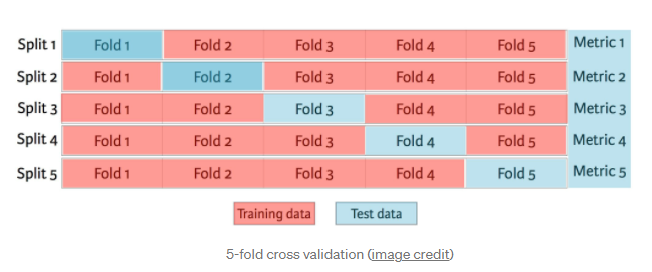